# 6.4 Supervised Machine Learning - Task version B

##  Script Contents

#### 1. Importing libraries and data
    - to include scikit-learn library and necessary modules
#### 2. Data Wrangling
    - trimmed columns from 6.3 version of listings df
#### 3. Data Cleaning
    - renaming columns
    - changing dtypes for null-> median imputation
    - extreme values check
        - price
        - estimated_revenue
#### 4. Data Prep for regression analysis
    - number of reviews vs estimated revenue
#### 5. Regression Analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#Setting path to Achievement 6 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER'

In [4]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [5]:
# Importing data from 6.2 - Entire home listings from 23 Dec ATX Airbnb webscrape
listings = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_clean.csv'), index_col = False)

In [6]:
# Importing data from 6.3 - Entire home listings from 23 Dec ATX Airbnb scrape
df =pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_63.csv'), index_col = False)

In [7]:
listings.head()

,Unnamed: 0,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Bathroom_Numeric,Price Category
0,0,2009-02-16,100.0,97.0,True,1.0,True,True,78702,30.26057,-97.73441,3,2.0,101.0,2,90,True,668,2009-03-08,2023-11-20,4.84,4.88,4.86,4.89,4.83,4.73,4.79,True,3.71,1.0,Middle Price
1,1,2009-04-20,100.0,100.0,True,1.0,True,True,78704,30.26034,-97.76487,2,2.0,159.0,3,365,True,312,2011-09-06,2023-12-04,4.97,4.97,4.96,4.99,4.97,4.97,4.89,True,2.09,1.0,Middle Price
2,2,2009-07-11,100.0,50.0,True,1.0,True,True,78741,30.23466,-97.73682,2,1.0,48.0,4,90,True,51,2010-02-19,2023-05-16,4.56,4.52,4.70,4.84,4.87,4.67,4.60,True,0.30,1.0,Low price
3,3,2009-11-02,100.0,93.0,True,2.0,True,True,78702,30.26098,-97.73072,3,2.0,123.0,30,180,True,18,2011-03-16,2023-06-19,5.00,4.94,4.94,5.00,5.00,5.00,4.94,True,0.12,2.0,Middle Price
4,4,2009-09-18,100.0,96.0,True,1.0,True,True,78745,30.19756,-97.78754,2,2.0,100.0,3,30,True,20,2022-10-25,2023-11-22,5.00,5.00,5.00,5.00,5.00,4.60,4.95,True,1.44,2.0,Middle Price


In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,listing_url,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_listings,host_entire_homes,host_private_rooms,host_shared_rooms,reviews_per_month,Bathroom_Numeric,Bathroom_String,estimated_occupancy,EROR,estimated_revenue
0,0,0,5456,https://www.airbnb.com/rooms/5456,8028,2009-02-16,100%,97%,True,East Downtown,1.0,"['email', 'phone']",t,t,78702,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1 bath,NaN,2.0,[],101.0,2,90,2,2,90,90,2.0,t,21,51,74,330,668,47,1,2009-03-08,2023-11-20,4.84,4.88,4.86,4.89,4.83,4.73,4.79,f,1,1,0,0,3.71,1.0,NaN,22.26,Medium occupancy,2248.26
1,1,3,6448,https://www.airbnb.com/rooms/6448,14156,2009-04-20,100%,100%,True,Zilker,1.0,"['email', 'phone']",t,t,78704,30.26034,-97.76487,Entire guesthouse,Entire home/apt,2,1 bath,NaN,2.0,[],159.0,3,365,3,3,1125,1125,3.0,t,10,10,16,160,312,21,2,2011-09-06,2023-12-04,4.97,4.97,4.96,4.99,4.97,4.97,4.89,t,1,1,0,0,2.09,1.0,NaN,12.54,Medium occupancy,1993.86
2,2,4,8502,https://www.airbnb.com/rooms/8502,25298,2009-07-11,100%,50%,True,East Riverside,1.0,"['email', 'phone']",t,f,78741,30.23466,-97.73682,Entire guest suite,Entire home/apt,2,1 bath,NaN,1.0,[],48.0,4,90,4,20,90,90,7.2,t,15,45,75,75,51,3,0,2010-02-19,2023-05-16,4.56,4.52,4.70,4.84,4.87,4.67,4.60,f,1,1,0,0,0.30,1.0,NaN,1.80,Low occupancy,86.40
3,3,5,13035,https://www.airbnb.com/rooms/13035,50793,2009-11-02,100%,93%,True,East Downtown,2.0,"['email', 'phone']",t,t,78702,30.26098,-97.73072,Entire home,Entire home/apt,3,2 baths,NaN,2.0,[],123.0,30,180,30,30,180,180,30.0,t,0,0,0,201,18,1,0,2011-03-16,2023-06-19,5.00,4.94,4.94,5.00,5.00,5.00,4.94,f,2,2,0,0,0.12,2.0,s,0.72,Very low occupancy,88.56
4,4,6,18258,https://www.airbnb.com/rooms/18258,39458,2009-09-18,100%,96%,True,NaN,1.0,"['email', 'phone']",t,t,78745,30.19756,-97.78754,Entire bungalow,Entire home/apt,2,2 baths,NaN,2.0,[],100.0,3,30,3,3,1125,1125,3.0,t,0,0,0,0,20,18,1,2022-10-25,2023-11-22,5.00,5.00,5.00,5.00,5.00,4.60,4.95,f,1,1,0,0,1.44,2.0,s,8.64,Medium occupancy,864.00


In [9]:
df.shape

(8576, 60)

In [10]:
listings.shape

(8674, 31)

### 2. Data Wrangling

Need to decide which version/df to proceed with. 

df is inflated with a lot of unnecessary, but could just strip away unneeded columns, and it already has ['estimated revenue'].

listings is already a lot more trimmed down, and includes price category. 

Question is, what variables am I going to conduct a supervised regression with?

- Dependent variables:
    - price
    - estimated revenue
- Independent variables:
    -  number of reviews
    - accommodates
    - review_scores
    - reviews per month
    
    
Since we need 'estimated revenue' as an alternate dependent variable (['price'] can change from night to night by the listing owner and is not reflected on a webscrape), will go with a stripped down df instead.

In [11]:
# Vars_list technique to select columns from df

vars_list = ['id','listing_url','host_id','host_since','host_response_rate', 'host_acceptance_rate',
             'host_is_superhost','neighbourhood_cleansed', 'latitude', 'longitude','property_type',
            'accommodates', 'beds', 'Bathroom_Numeric', 'price', 'number_of_reviews', 'number_of_reviews_l30d',
             'first_review', 'last_review', 'review_scores_rating', 
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
             'review_scores_location', 'review_scores_value', 'host_listings', 'reviews_per_month',
             'estimated_occupancy', 'EROR', 'estimated_revenue']

In [12]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_63.csv'), usecols = vars_list, index_col = False)

### 3. Data Cleaning

In [13]:
df.columns

Index(['id', 'listing_url', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'accommodates', 'beds',
       'price', 'number_of_reviews', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_listings', 'reviews_per_month',
       'Bathroom_Numeric', 'estimated_occupancy', 'EROR', 'estimated_revenue'],
      dtype='object')

In [14]:
df.head(10)

,id,listing_url,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,beds,price,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings,reviews_per_month,Bathroom_Numeric,estimated_occupancy,EROR,estimated_revenue
0,5456,https://www.airbnb.com/rooms/5456,8028,2009-02-16,100%,97%,True,78702,30.26057,-97.73441,Entire guesthouse,3,2.0,101.0,668,1,2009-03-08,2023-11-20,4.84,4.88,4.86,4.89,4.83,4.73,4.79,1,3.71,1.0,22.26,Medium occupancy,2248.26
1,6448,https://www.airbnb.com/rooms/6448,14156,2009-04-20,100%,100%,True,78704,30.26034,-97.76487,Entire guesthouse,2,2.0,159.0,312,2,2011-09-06,2023-12-04,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,2.09,1.0,12.54,Medium occupancy,1993.86
2,8502,https://www.airbnb.com/rooms/8502,25298,2009-07-11,100%,50%,True,78741,30.23466,-97.73682,Entire guest suite,2,1.0,48.0,51,0,2010-02-19,2023-05-16,4.56,4.52,4.70,4.84,4.87,4.67,4.60,1,0.30,1.0,1.80,Low occupancy,86.40
3,13035,https://www.airbnb.com/rooms/13035,50793,2009-11-02,100%,93%,True,78702,30.26098,-97.73072,Entire home,3,2.0,123.0,18,0,2011-03-16,2023-06-19,5.00,4.94,4.94,5.00,5.00,5.00,4.94,2,0.12,2.0,0.72,Very low occupancy,88.56
4,18258,https://www.airbnb.com/rooms/18258,39458,2009-09-18,100%,96%,True,78745,30.19756,-97.78754,Entire bungalow,2,2.0,100.0,20,1,2022-10-25,2023-11-22,5.00,5.00,5.00,5.00,5.00,4.60,4.95,1,1.44,2.0,8.64,Medium occupancy,864.00
5,22828,https://www.airbnb.com/rooms/22828,56488,2009-11-22,100%,50%,True,78741,30.23614,-97.73225,Entire guesthouse,2,1.0,58.0,51,0,2010-03-16,2023-08-15,4.94,5.00,4.98,5.00,5.00,4.78,4.87,1,0.30,1.0,1.80,Low occupancy,104.40
6,22982,https://www.airbnb.com/rooms/22982,89031,2010-03-06,100%,98%,True,78703,30.28074,-97.75381,Entire guesthouse,4,2.0,250.0,168,0,2010-03-16,2023-10-23,4.91,4.93,4.97,4.96,4.90,4.88,4.83,1,1.00,1.0,6.00,Medium occupancy,1500.00
7,40285,https://www.airbnb.com/rooms/40285,170787,2010-07-18,NaN,100%,True,78731,30.35123,-97.76207,Entire home,4,2.0,450.0,40,0,2011-02-28,2023-10-23,4.92,4.95,4.95,4.97,4.92,4.92,4.79,1,0.26,2.0,1.56,Low occupancy,702.00
8,50318,https://www.airbnb.com/rooms/50318,12409,2009-04-06,100%,83%,True,78705,30.28588,-97.75145,Entire condo,2,3.0,100.0,34,0,2010-10-25,2023-07-18,4.88,4.74,4.74,5.00,4.97,4.84,4.81,2,0.21,1.0,1.26,Low occupancy,126.00
9,57187,https://www.airbnb.com/rooms/57187,272156,2010-10-27,100%,99%,True,78704,30.25756,-97.76995,Entire guesthouse,6,3.0,90.0,1016,4,2011-01-02,2023-12-07,4.92,4.94,4.93,4.96,4.96,4.95,4.82,2,6.44,1.0,30.00,High occupancy,2700.00


In [15]:
df.shape

(8576, 31)

In [16]:
df.rename(columns = {'Bathroom_Numeric' : 'bathrooms', 
            'review_scores_rating' : 'review_scores'}, inplace = True)

In [17]:
#changing dtypes for imputation

df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_response_rate'] = df['host_response_rate'].astype(float)

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%','')
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)

In [18]:
df['host_since'] = df['host_since'].astype('datetime64[ns]')


In [19]:
df.dtypes

id                                      int64
listing_url                            object
host_id                                 int64
host_since                     datetime64[ns]
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                        bool
neighbourhood_cleansed                  int64
latitude                              float64
longitude                             float64
property_type                          object
accommodates                            int64
beds                                  float64
price                                 float64
number_of_reviews                       int64
number_of_reviews_l30d                  int64
first_review                           object
last_review                            object
review_scores                         float64
review_scores_accuracy                float64
review_scores_cleanliness             float64
review_scores_checkin             

In [20]:
df.head()

,id,listing_url,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,beds,price,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings,reviews_per_month,bathrooms,estimated_occupancy,EROR,estimated_revenue
0,5456,https://www.airbnb.com/rooms/5456,8028,2009-02-16,100.0,97.0,True,78702,30.26057,-97.73441,Entire guesthouse,3,2.0,101.0,668,1,2009-03-08,2023-11-20,4.84,4.88,4.86,4.89,4.83,4.73,4.79,1,3.71,1.0,22.26,Medium occupancy,2248.26
1,6448,https://www.airbnb.com/rooms/6448,14156,2009-04-20,100.0,100.0,True,78704,30.26034,-97.76487,Entire guesthouse,2,2.0,159.0,312,2,2011-09-06,2023-12-04,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,2.09,1.0,12.54,Medium occupancy,1993.86
2,8502,https://www.airbnb.com/rooms/8502,25298,2009-07-11,100.0,50.0,True,78741,30.23466,-97.73682,Entire guest suite,2,1.0,48.0,51,0,2010-02-19,2023-05-16,4.56,4.52,4.70,4.84,4.87,4.67,4.60,1,0.30,1.0,1.80,Low occupancy,86.40
3,13035,https://www.airbnb.com/rooms/13035,50793,2009-11-02,100.0,93.0,True,78702,30.26098,-97.73072,Entire home,3,2.0,123.0,18,0,2011-03-16,2023-06-19,5.00,4.94,4.94,5.00,5.00,5.00,4.94,2,0.12,2.0,0.72,Very low occupancy,88.56
4,18258,https://www.airbnb.com/rooms/18258,39458,2009-09-18,100.0,96.0,True,78745,30.19756,-97.78754,Entire bungalow,2,2.0,100.0,20,1,2022-10-25,2023-11-22,5.00,5.00,5.00,5.00,5.00,4.60,4.95,1,1.44,2.0,8.64,Medium occupancy,864.00


#### *Missing Values*

In [21]:
# Check for missing values

df.isnull().sum()

id                               0
listing_url                      0
host_id                          0
host_since                       1
host_response_rate             796
host_acceptance_rate           445
host_is_superhost                0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
accommodates                     0
beds                            45
price                            0
number_of_reviews                0
number_of_reviews_l30d           0
first_review                     0
last_review                      0
review_scores                    0
review_scores_accuracy           1
review_scores_cleanliness        1
review_scores_checkin            1
review_scores_communication      1
review_scores_location           1
review_scores_value              3
host_listings                    0
reviews_per_month                0
bathrooms                        0
estimated_occupancy 

In [22]:
# Imputing missing values with median

df['host_since'].fillna(df['host_since'].median(), inplace = True)
df['host_id'].fillna(df['host_id'].median(), inplace = True)
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace = True)
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace = True)
df['beds'].fillna(df['beds'].median(), inplace = True)
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].median(), inplace = True)
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace = True)
df['review_scores_checkin'].fillna(df['review_scores_checkin'].median(), inplace = True)
df['review_scores_communication'].fillna(df['review_scores_communication'].median(), inplace = True)
df['review_scores_location'].fillna(df['review_scores_location'].median(), inplace = True)
df['review_scores_value'].fillna(df['review_scores_value'].median(), inplace = True)

# None of these will be essential to the Regression analysis in this notebook
# but they could be relevant down the line.

In [23]:
dups = df.duplicated()

In [24]:
dups.shape

# No duplicates

(8576,)

#### *Extreme values checks*

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_21214/3930668211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins = 25)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='price', ylabel='Density'>

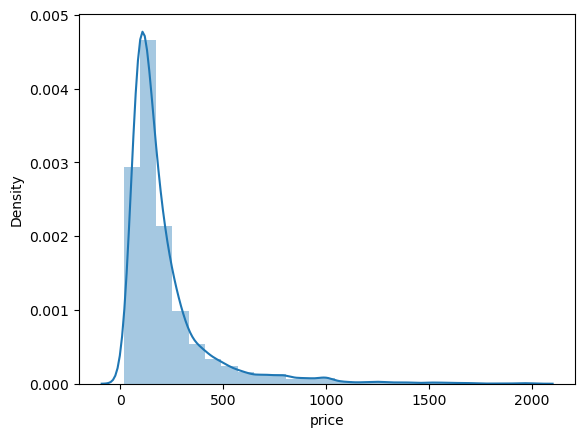

In [25]:
sns.distplot(df['price'], bins = 25)

In [26]:
df['price'].mean()

218.3866604477612

In [27]:
df['price'].median()

148.0

In [28]:
df['price'].max()

1995.0

Considering removing values above 1500 or even 1000, let's try without doing so first.

Also going to run extreme values check on estimated revenue. Since 'price' is ultimately determined by the host and doesn't reflect changes, using reviews to estimate revenue is a more dynamic figure for listing success.

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_21214/3558797306.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['estimated_revenue'], bins = 25)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='estimated_revenue', ylabel='Density'>

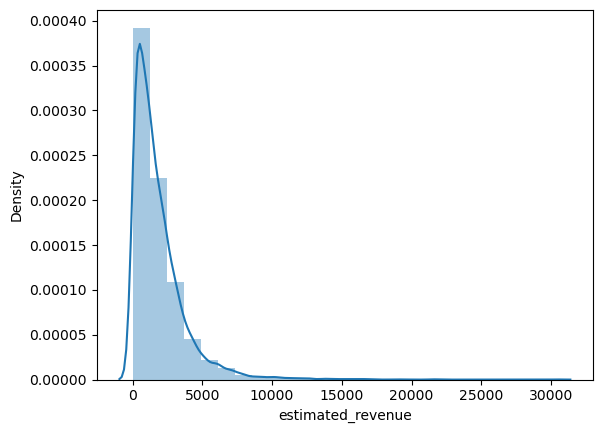

In [29]:
sns.distplot(df['estimated_revenue'], bins = 25)

In [30]:
df['estimated_revenue'].mean()

1843.8546198694028

In [31]:
df['estimated_revenue'].median()

1308.06

In [32]:
df['estimated_revenue'].max()

30420.0

In [33]:
df['estimated_revenue'].min()

14.4

#### Estimated revenue mean and median figures are reasonable (maybe even on the low side for a STR market like Austin)

##### Can see removal of 99 and 1st percentile of listings being appropriate later on.

### 4. Data Prep for Regression Analysis

#### Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.


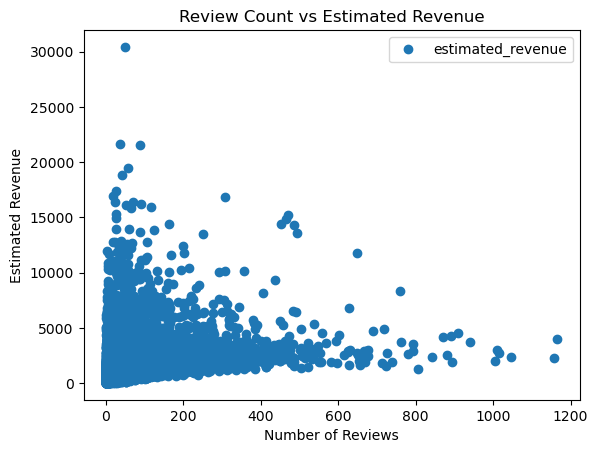

In [45]:
df.plot(x = 'number_of_reviews', y='estimated_revenue',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Review Count vs Estimated Revenue')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Estimated Revenue')  
plt.show()

# will rerun this with review scores vs est_rev

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['number_of_reviews'].values.reshape(-1,1)
y = df['estimated_revenue'].values.reshape(-1,1)

In [39]:
X

array([[668],
       [312],
       [ 51],
       ...,
       [  1],
       [  1],
       [  1]])

In [40]:
y

array([[2248.26],
       [1993.86],
       [  86.4 ],
       ...,
       [ 510.  ],
       [ 822.  ],
       [ 402.  ]])

In [41]:
# Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [42]:
# Creating a regression object.

regression = LinearRegression()

# This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

*Creating a plot that shows the regression line from the model on the test set.*

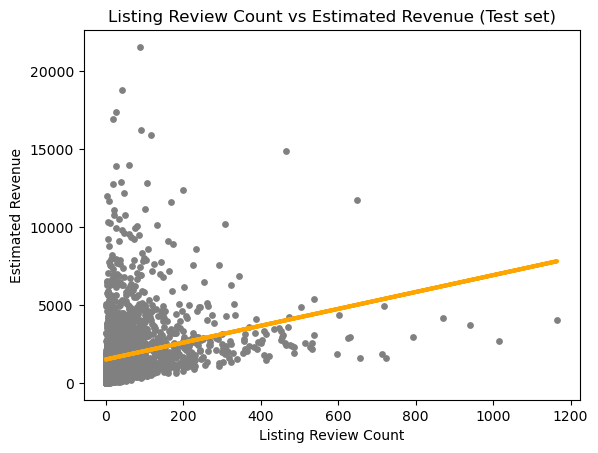

In [46]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Listing Review Count vs Estimated Revenue (Test set)')
plot_test.xlabel('Listing Review Count')
plot_test.ylabel('Estimated Revenue')
plot_test.show()

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.39876936]]
Mean squared error:  3845034.6946773776
R2 score:  0.06045880070998533


##### With a rmse over 3,000,000 and a R2 Score below 0.1 (1 being a perfect fit, 0 indicating a poor fit), it's safe to say the model does not fit very well.

Surprisingly a worse fit than Max Accomodation vs Estimated Revenue

In [49]:
y_predicted

array([[1548.11270023],
       [1634.49300991],
       [2838.41857609],
       ...,
       [2039.40071154],
       [1607.49916314],
       [1526.51762281]])

In [51]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

# way off, which is line with the rmse in the millions, an r2 at 0.06

,Actual,Predicted
0,2730.00,1548.112700
1,3990.24,1634.493010
2,4857.06,2838.418576
3,1945.68,1672.284395
4,403.20,1569.707778
5,2794.80,1656.088087
6,2198.76,1893.633939
7,2401.20,1661.486857
8,2719.20,1558.910239
9,2016.90,1612.897932


##### Compare how the regression fits the training set

In [52]:
# Predict.

y_predicted_train = regression.predict(X_train) 

# This is predicting X_train!

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.39876936]]
Mean squared error:  3366505.7519640173
R2 score:  0.07431776120192424


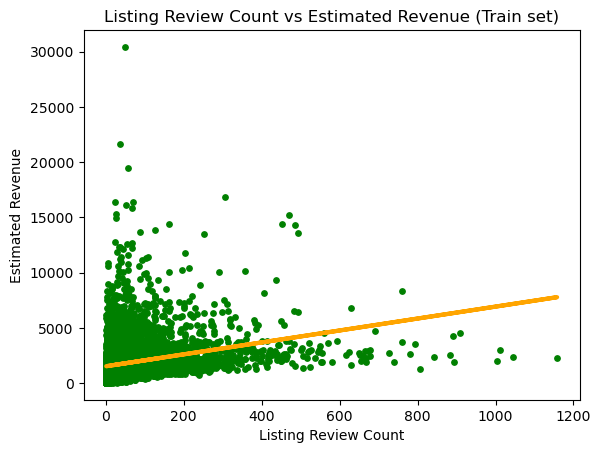

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('Listing Review Count vs Estimated Revenue (Train set)')
plot_test.xlabel('Listing Review Count')
plot_test.ylabel('Estimated Revenue')
plot_test.show()

## Takeaway:

Although there is a gradual trend toward slightly higher estimated revenue as review count increases, it also seems to plateau along the higher review counts.

What the model does not account for at all is the high volume of low-review count, high to extremely high revenue listings. 

#### This does signal that if a listing is competitive, (be it for price, accomodations, region, aesthetics, amenities), it doesn't take long to break into the market and compete.

### Going to rerun this notebook with my other hypotheses:

#### -review_scores x estimated revenue

Going to try removing outliers to see how much would need to be removed to see significant increase in rmse and r2.

### Bonus: performance improvement after removing outliers


In [102]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

q = df['estimated_revenue'].quantile(0.99)
z = df['estimated_revenue'].quantile(0.01)

In [103]:
df_test = df[df['estimated_revenue']<q]
df_test = df[df['estimated_revenue']>z]

In [104]:
df_test.shape

(8319, 31)

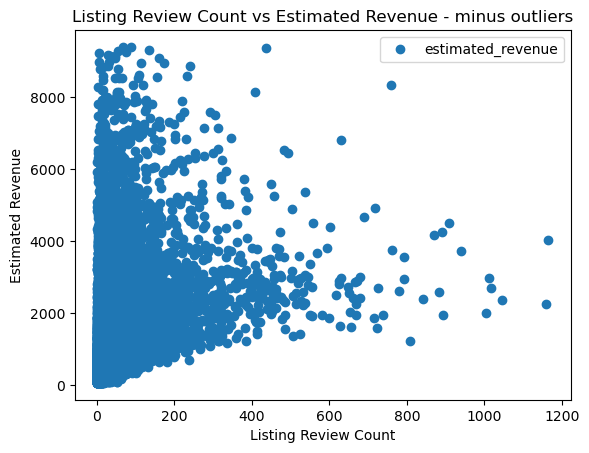

In [105]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'number_of_reviews', y='estimated_revenue', style='o')  
plt.title('Listing Review Count vs Estimated Revenue - minus outliers')  
plt.xlabel('Listing Review Count')  
plt.ylabel('Estimated Revenue')  
plt.show()

In [106]:
# Reshape again.

X_2 = df_test['number_of_reviews'].values.reshape(-1,1)
y_2 = df_test['estimated_revenue'].values.reshape(-1,1)

In [107]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [108]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [109]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [110]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [111]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.71000155]]
Mean squared error:  2203588.655680786
R2 score:  0.08321826436728741


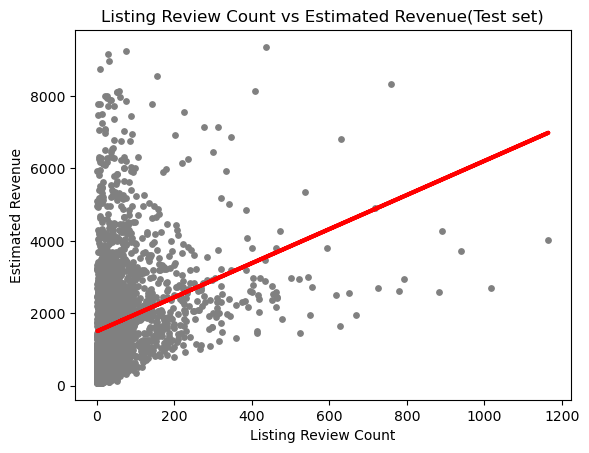

In [112]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Listing Review Count vs Estimated Revenue(Test set)')
plot_test.xlabel('Listing Review Count')
plot_test.ylabel('Estimated Revenue')
plot_test.show()

### Removing top and bottom 1% of listings by estimated revenue improved the model fit incrimentally but not significantly. 
##### We still see outliers numerous outliers that the model doesn't really account for.

Going to experiment, what if we removed top/bottom 10% of values? 
What about 75% and 25%?

- tried it, it incrementally improves RMSE and R2 but still doesn't really make the model fit at all.

In [113]:
df.to_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_64.csv'))